# Stock Valuation Using Fundimental Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1.Web Scraping 

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://finance.yahoo.com/quote/TSE/key-statistics?p=TSE"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
title=soup.title
print(title)

<title>TSE Key Statistics | Trinseo S.A. Stock - Yahoo Finance</title>


In [6]:
rows=soup.find_all('tr')
print(rows[:10])

[<tr class="Bxz(bb) H(36px) BdY Bdc($seperatorColor) ks-row Bgc($extraLightBlue):h" data-reactid="14"><td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px) Miw(140px)" data-reactid="15"><span data-reactid="16">Market Cap (intraday)</span><!-- react-text: 17 --> <!-- /react-text --><!-- react-text: 18 --><!-- /react-text --><sup aria-label="Shares outstanding is taken from the most recently filed quarterly or annual report and Market Cap is calculated using shares outstanding." data-reactid="19">5</sup><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)" data-reactid="20"></div></td><td class="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)" data-reactid="21">1.58B</td></tr>, <tr class="Bxz(bb) H(36px) BdB Bdbc($seperatorColor) ks-row Bgc($extraLightBlue):h" data-reactid="22"><td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px)" data-reactid="23"><span data-reactid="24">Enterpris

In [7]:
for row in rows:
    row_td= row.find_all('td')
    print (row_td)

[<td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px) Miw(140px)" data-reactid="15"><span data-reactid="16">Market Cap (intraday)</span><!-- react-text: 17 --> <!-- /react-text --><!-- react-text: 18 --><!-- /react-text --><sup aria-label="Shares outstanding is taken from the most recently filed quarterly or annual report and Market Cap is calculated using shares outstanding." data-reactid="19">5</sup><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)" data-reactid="20"></div></td>, <td class="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)" data-reactid="21">1.58B</td>]
[<td class="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px)" data-reactid="23"><span data-reactid="24">Enterprise Value</span><!-- react-text: 25 --> <!-- /react-text --><!-- react-text: 26 --><!-- /react-text --><sup aria-label="Data derived from multiple sources or calculated by Yahoo Finance." data-reactid="27">3

In [8]:
type(row_td)

bs4.element.ResultSet

In [9]:
str_cells=str(row_td)
cleantext= BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[Levered Free Cash Flow (ttm), 235.04M]


In [10]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[Levered Free Cash Flow (ttm), 235.04M]


str

In [11]:
Value = pd.DataFrame(list_rows)
Value.head(10)

,0
0,"[Market Cap (intraday) 5, 1.58B]"
1,"[Enterprise Value 3, 2.46B]"
2,"[Trailing P/E , 12.11]"
3,"[Forward P/E 1, 7.33]"
4,"[PEG Ratio (5 yr expected) 1, -2.54]"
5,"[Price/Sales (ttm), 0.37]"
6,"[Price/Book (mrq), 2.15]"
7,"[Enterprise Value/Revenue 3, 0.58]"
8,"[Enterprise Value/EBITDA 6, 10.40]"
9,"[Beta (3Y Monthly) , 1.99]"


In [12]:
Value = Value[0].str.split(',', expand=True)
Value.head(10)

,0,1,2
0,[Market Cap (intraday) 5,1.58B],None
1,[Enterprise Value 3,2.46B],None
2,[Trailing P/E,12.11],None
3,[Forward P/E 1,7.33],None
4,[PEG Ratio (5 yr expected) 1,-2.54],None
5,[Price/Sales (ttm),0.37],None
6,[Price/Book (mrq),2.15],None
7,[Enterprise Value/Revenue 3,0.58],None
8,[Enterprise Value/EBITDA 6,10.40],None
9,[Beta (3Y Monthly),1.99],None


In [13]:
Value[0] =Value[0].str.strip('[')
Value[1] = Value[1].str.strip(']')
Value.head(10)

,0,1,2
0,Market Cap (intraday) 5,1.58B,None
1,Enterprise Value 3,2.46B,None
2,Trailing P/E,12.11,None
3,Forward P/E 1,7.33,None
4,PEG Ratio (5 yr expected) 1,-2.54,None
5,Price/Sales (ttm),0.37,None
6,Price/Book (mrq),2.15,None
7,Enterprise Value/Revenue 3,0.58,None
8,Enterprise Value/EBITDA 6,10.40,None
9,Beta (3Y Monthly),1.99,None


In [14]:
E_Value= Value.loc[:9]
print(E_Value)

                             0       1     2
0      Market Cap (intraday) 5   1.58B  None
1           Enterprise Value 3   2.46B  None
2                Trailing P/E    12.11  None
3                Forward P/E 1    7.33  None
4  PEG Ratio (5 yr expected) 1   -2.54  None
5            Price/Sales (ttm)    0.37  None
6             Price/Book (mrq)    2.15  None
7   Enterprise Value/Revenue 3    0.58  None
8    Enterprise Value/EBITDA 6   10.40  None
9           Beta (3Y Monthly)     1.99  None


In [15]:
type(E_Value)

pandas.core.frame.DataFrame

In [16]:
E_Value.columns =['Valueation Measures', 'Current Data','Delete']

In [17]:
E_Value=E_Value.dropna(axis=1, how='any')
E_Value

,Valueation Measures,Current Data
0,Market Cap (intraday) 5,1.58B
1,Enterprise Value 3,2.46B
2,Trailing P/E,12.11
3,Forward P/E 1,7.33
4,PEG Ratio (5 yr expected) 1,-2.54
5,Price/Sales (ttm),0.37
6,Price/Book (mrq),2.15
7,Enterprise Value/Revenue 3,0.58
8,Enterprise Value/EBITDA 6,10.40
9,Beta (3Y Monthly),1.99


In [18]:
E_Value.dtypes

Valueation Measures    object
Current Data           object
dtype: object

In [19]:
E_Value.iloc[0,E_Value.columns.get_loc('Current Data')] = 1.59
E_Value.iloc[1,E_Value.columns.get_loc('Current Data')] = 2.46
E_Value

,Valueation Measures,Current Data
0,Market Cap (intraday) 5,1.59
1,Enterprise Value 3,2.46
2,Trailing P/E,12.11
3,Forward P/E 1,7.33
4,PEG Ratio (5 yr expected) 1,-2.54
5,Price/Sales (ttm),0.37
6,Price/Book (mrq),2.15
7,Enterprise Value/Revenue 3,0.58
8,Enterprise Value/EBITDA 6,10.40
9,Beta (3Y Monthly),1.99


In [20]:
E_Value.dtypes

Valueation Measures    object
Current Data           object
dtype: object

In [21]:
E_Value2=E_Value['Current Data'].astype(float)

In [25]:
if E_Value2.loc[8]['Current Data']<=7:
    print('Pass')
else:
        print('Need Technology Approach')

IndexError: invalid index to scalar variable.

Technology Approach

In [4]:
TSE=pd.read_csv('TSE.CSV')
TSE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,80.940002,81.419998,79.580002,81.010002,78.436867,445500
1,2018-10-09,80.690002,80.720001,75.870003,76.150002,74.097099,1087100
2,2018-10-10,69.449997,70.000000,59.910000,60.349998,58.723045,2586200
3,2018-10-11,59.990002,60.967999,58.259998,59.509998,57.905689,1290200
4,2018-10-12,60.630001,61.790001,60.505001,61.490002,59.832314,665500


In [5]:
TSE2=TSE.iloc[::-1].reset_index(drop=True)
TSE2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,40.160000,41.169998,39.700001,39.880001,39.880001,517800
1,2019-10-04,40.130001,40.889999,39.700001,40.529999,40.529999,194400
2,2019-10-03,39.490002,40.080002,38.915001,40.080002,40.080002,224900
3,2019-10-02,40.110001,40.599998,39.062000,39.759998,39.759998,479000
4,2019-10-01,43.320000,44.660000,40.730000,40.849998,40.849998,350700


In [6]:
TSE3=TSE2.set_index('Date')
TSE4=pd.DataFrame(TSE3.loc[:,'Close'])
TSE4


,Close
Date,
2019-10-07,39.880001
2019-10-04,40.529999
2019-10-03,40.080002
2019-10-02,39.759998
2019-10-01,40.849998
2019-09-30,42.950001
2019-09-27,43.130001
2019-09-26,43.240002
2019-09-25,43.320000


In [16]:
short_rolling=TSE4.rolling(window=30).mean()
short_rolling.head(30)

,Close
Date,
2019-10-07,NaN
2019-10-04,NaN
2019-10-03,NaN
2019-10-02,NaN
2019-10-01,NaN
2019-09-30,NaN
2019-09-27,NaN
2019-09-26,NaN
2019-09-25,NaN


In [7]:
long_rolling = TSE4.rolling(window=100).mean()
long_rolling.tail()

,Close
Date,
2018-10-12,50.0847
2018-10-11,50.2124
2018-10-10,50.3429
2018-10-09,50.6138
2018-10-08,50.9248


KeyError: 'TSE'

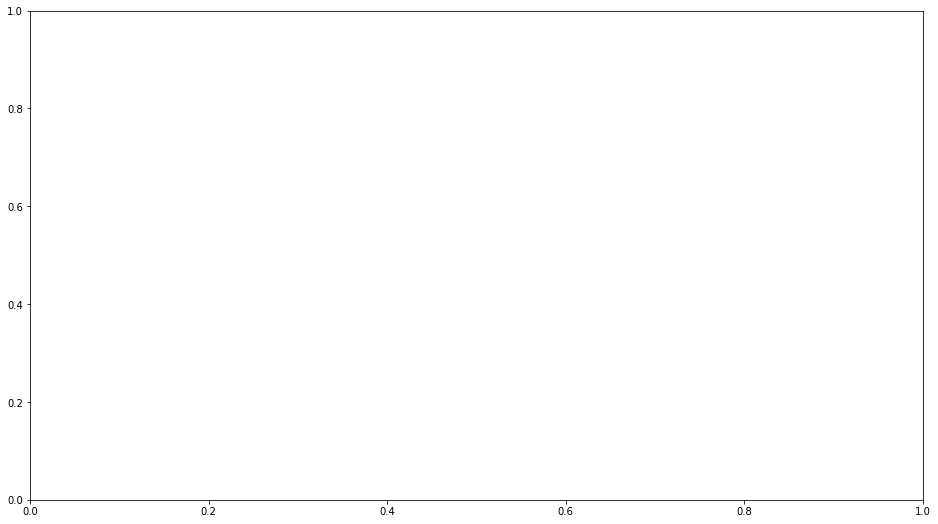

In [9]:
start_date = '2018-10-08'
end_date = '2019-10-07'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(TSE4.loc[start_date:end_date, :].index, TSE4.loc[start_date:end_date, 'TSE'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'TSE'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'TSE'], label = '30-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
